In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [3]:
df = pd.read_csv("Fish_dataset.csv")

In [4]:
df.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

/Users/anchitshrivastava/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Species', ylabel='count'>

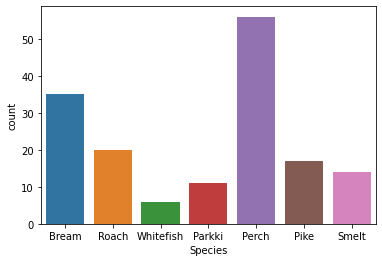

In [6]:
sns.countplot(df['Species'])

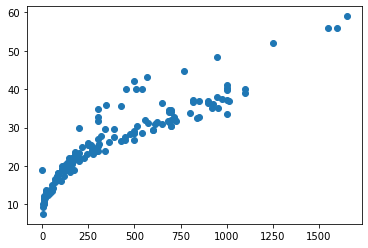

In [7]:
plt.scatter(df['Weight'],df['Length1'])
plt.show()

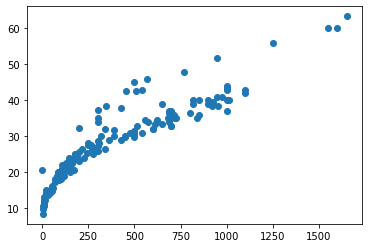

In [8]:
plt.scatter(df['Weight'],df['Length2'])
plt.show()

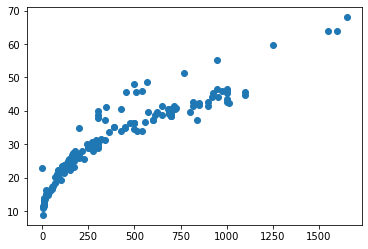

In [9]:
plt.scatter(df['Weight'],df['Length3'])
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [11]:
df.corr()
# Here we see that Length2 has the maximum effect on Weight
# We will make predictions using Length2 and Weight

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [12]:
# The equartion of line is Y = mX + c
# where m is the slope and c is the intercept
Y = df['Weight'] #dependent variable 
X = df['Length2'] #independent variable 

In [13]:
def calmandc(a,b):
    #Calculating m
    x_mean = a.mean()
    y_mean = b.mean()
    mnum = np.sum((a-x_mean)*(b-y_mean))
    mden = np.sum(pow((a-x_mean),2))
    m = mnum/mden
    #Calculating c
    c = y_mean - (m * x_mean)
    return m,c

In [14]:
m,c = calmandc(X,Y)

In [15]:
print("The equation of line is ",end = " ")
print("Weight = ",end=" ")
print(m,end=" ")
print(" * Length2",end=" ")
print(" + ",c)

The equation of line is  Weight =  30.686370858918874  * Length2  +  -473.64900740680105


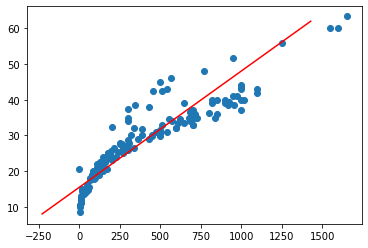

In [16]:
#Plotting scatter plot and applying linear regression for Bream 
x_max = int(max(X))
x_min = int(min(X))
aaa1=[]
bbb1=[]
for i in range(x_min,x_max):
    aaa1.append((m*i)+c)
    bbb1.append(i)
plt.scatter(Y,X)
plt.plot(aaa1,bbb1,color='red')
plt.show()

In [17]:
#In the above graph we see that accuracy is not that great. 
#For dealing with the outliers, I have grouped by species to get accurate results.
df1 = df.groupby('Species')

In [18]:
x_bream = df1.get_group('Bream')['Length2']
y_bream = df1.get_group('Bream')['Weight']
m_bream,c_bream = calmandc(x_bream,y_bream)
print(m_bream,c_bream)

50.6047962852731 -1057.6239410106994


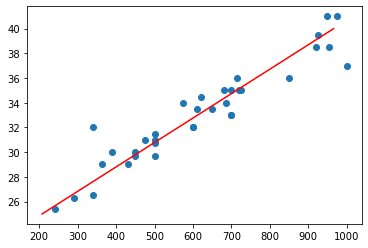

In [19]:
#Plotting scatter plot and applying linear regression for Bream 
x_max = int(max(x_bream))
x_min = int(min(x_bream))
aaa=[]
bbb=[]
for i in range(x_min,x_max):
    aaa.append((m_bream*i)+c_bream)
    bbb.append(i)
plt.scatter(y_bream,x_bream)
plt.plot(aaa,bbb,color='red')
plt.show()

In [20]:
#Comparing predicted weights and actual weights of the model which was not grouped by species 
Weight = df['Weight']
df2 = pd.DataFrame(Weight)
df2['Predicted Weights'] = (m*X)+c
df2

,Weight,Predicted Weights
0,242.0,305.784812
1,290.0,333.402546
2,340.0,339.539820
3,363.0,416.255748
4,430.0,416.255748
...,...,...
154,12.2,-99.275283
155,13.4,-93.138009
156,12.2,-74.726186
157,19.7,-34.833904


In [21]:
#Comparing actual weights and predicted weights of grouped by Species
df3 = pd.DataFrame(df1.get_group('Bream')['Weight'])
df3['Predicted Weights'] = (m_bream * x_bream) + c_bream
df3

,Weight,Predicted Weights
0,242.0,227.737885
1,290.0,273.282201
2,340.0,283.403161
3,363.0,409.915151
4,430.0,409.915151
5,450.0,445.338509
6,500.0,445.338509
7,390.0,460.519948
8,450.0,460.519948
9,500.0,495.943305


In [22]:
# We see here that it is more accurate as compared to our previous approach

In [23]:
df2.head(2)

,Weight,Predicted Weights
0,242.0,305.784812
1,290.0,333.402546


In [24]:
df3.head(2)

,Weight,Predicted Weights
0,242.0,227.737885
1,290.0,273.282201


In [25]:
#Comparing with sklearn libraries
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [39]:
regr = LinearRegression() 
X = np.array(df['Length2']).reshape(-1, 1) 
y = np.array(df['Weight']).reshape(-1, 1)  
regr.fit(X,y)
regr.score(X,y)

0.8438584812596858

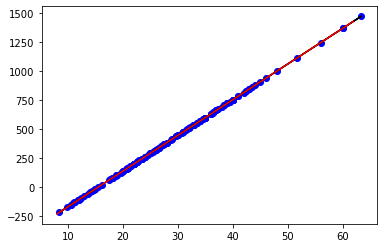

In [28]:
y = regr.predict(X) 
plt.scatter(X, y, color ='b') 
plt.plot(X, y, color ='k') 
plt.plot(bbb1,aaa1,color='red')
plt.show() 